## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [2]:
!pip install --upgrade pip
!pip install --upgrade yfinance
!pip install --upgrade websockets


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 2.8 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.1 MB/s  0:00:00


ERROR: To modify pip, please run the following command:
D:\Anaconda\envs\py310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached websockets-15.0.1-cp310-cp310-win_amd64.whl.metadata (7.0 kB)
Using cached websockets-15.0.1-cp310-cp310-win_amd64.whl (176 kB)
  Attempting uninstall: websockets
    Found existing installation: websockets 10.4
    Uninstalling websockets-10.4:
      Successfully uninstalled websockets-10.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires websockets<11.0,>=10.0, but you have websockets 15.0.1 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np  
import pandas as pd  
import yfinance as yf  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline


ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2015-01-01')['Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

print("Drift:", drift.values)
print("Standard Deviation:", stdev.values)

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_33100\3666811670.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker] = yf.download(ticker, start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed

Drift: [0.00079341]
Standard Deviation: [0.01697674]


***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [12]:
S0 = data['MSFT'].iloc[-1]
print("Giá điều chỉnh cuối cùng (S0):", S0)


Giá điều chỉnh cuối cùng (S0): 514.3300170898438


Create a variable price_list with the same dimension as the daily_returns matrix. 

In [13]:
price_list = np.zeros_like(daily_returns)
print(price_list.shape)


(250, 10)


Set the values on the first row of the price_list array equal to S0.

In [14]:
price_list[0] = S0


Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [15]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]


Finally, plot the obtained price list data.

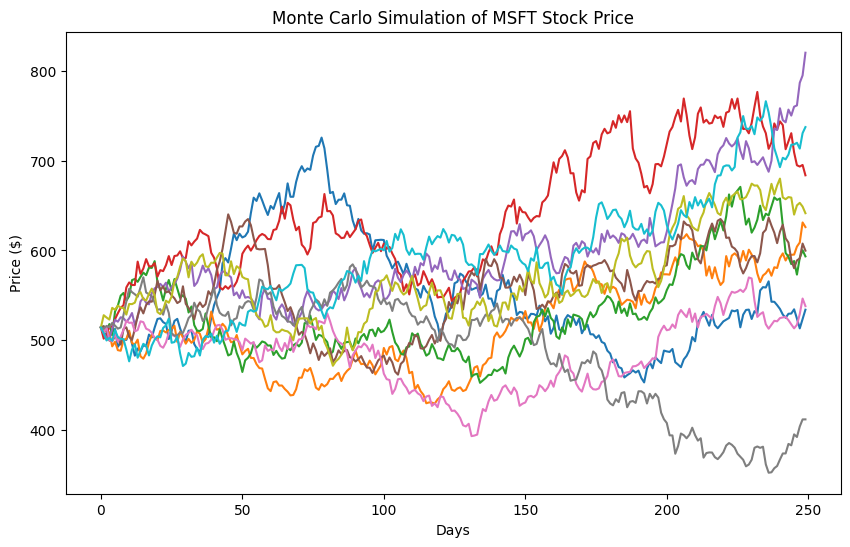

In [16]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.title("Monte Carlo Simulation of MSFT Stock Price")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.show()
